In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
sampling_freq, audio = wavfile.read('input_read.wav')

In [3]:
# Print the params
print ('\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (132300,)
Datatype: int16
Duration: 3.0 seconds


In [4]:
# Normalize the values
audio = audio / (2**15)

In [5]:
audio

array([-0.11880493, -0.55987549, -0.30639648, ...,  0.61932373,
        0.92489624,  0.29547119])

In [6]:
# Extract first 30 values for plotting
audio = audio[:30]

In [7]:
# Build the time axis
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)

In [8]:
# Convert to seconds
x_values *= 1000

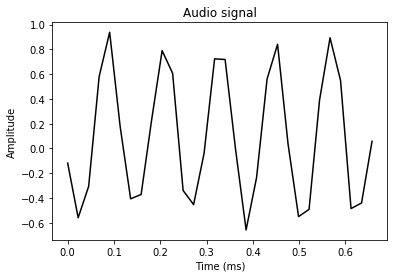

In [9]:
# Plotting the chopped audio signal
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

# Transforming audio signals into frequency domain

To convert time domain into frequency domain, we need to apply Fourier Transform

In [10]:
# Read the input file
sampling_freq, audio = wavfile.read('input_freq.wav')

In [11]:
# Normalize the values
audio = audio / (2**15)

In [12]:
# Extract length
len_audio = len(audio)

Let's apply the Fourier transform. The Fourier transform signal is mirrored along the center, so we just need to take the first half of the transformed signal. Our end goal is to extract the power signal. So, we square the values in the signal in preparation for this

In [13]:
# Apply Fourier transform
transformed_signal = np.fft.fft(audio)
half_length = np.ceil((len_audio + 1) / 2.0) #return the ceiling fucntion
half_length = int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal /= float(len_audio)
transformed_signal **= 2 #generating the power signal

In [14]:
# Extract length of transformed signal
len_ts = len(transformed_signal)

In [15]:
# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

In [16]:
# Extract power in dB
power = 10 * np.log10(transformed_signal)

In [17]:
# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

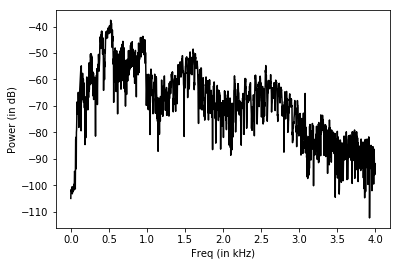

In [18]:
# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()